In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('AFData.csv')

## Visualization

In [3]:
df.columns

Index(['Date', 'Team', 'Opponent', 'Place', 'Position', 'Player', 'Age', 'G',
       'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'L10 GP', 'L10 MIN', 'L10 FG%',
       'L10 3P%', 'L10 FT%', 'L10 REB', 'L10 AST', 'L10 BLK', 'L10 STL',
       'L10 PF', 'L10 TO', 'L10 PTS', 'VsOpp GP', 'VsOpp MIN', 'VsOpp FG%',
       'VsOpp 3P%', 'VsOpp FT%', 'VsOpp REB', 'VsOpp AST', 'VsOpp BLK',
       'VsOpp STL', 'VsOpp PF', 'VsOpp TO', 'VsOpp PTS', 'Place GP',
       'Place MIN', 'Place FG%', 'Place 3P%', 'Place FT%', 'Place REB',
       'Place AST', 'Place BLK', 'Place STL', 'Place PF', 'Place TO',
       'Place PTS', 'Points O/U line', 'PRA O/U line', 'Actual Points',
       'Actual PRA'],
      dtype='o

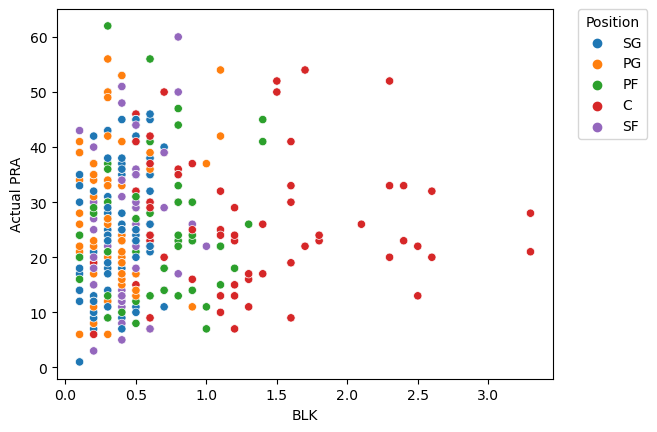

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, y="Actual PRA", x="BLK", hue='Position')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Position")

C:\Users\student\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


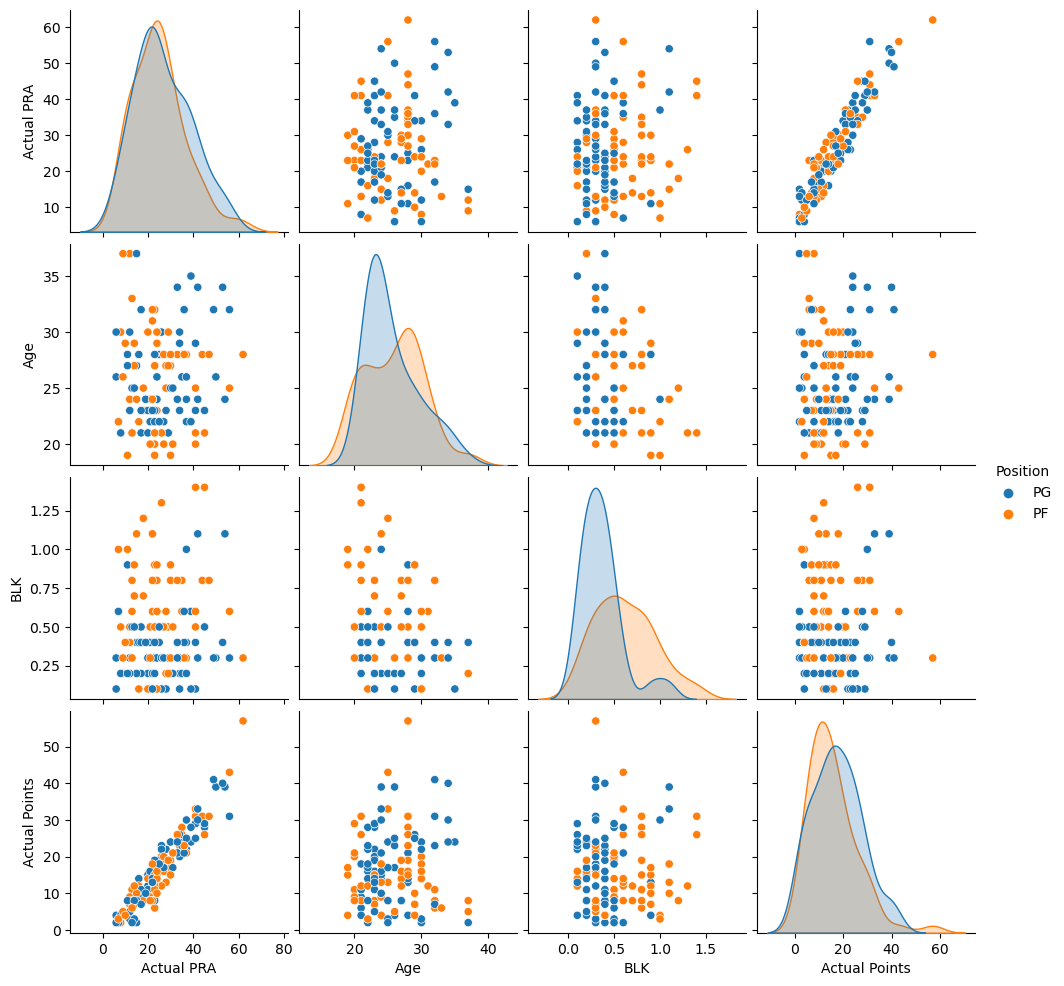

In [5]:
df1 = df[(df["Position"] == 'PF') | (df["Position"] == 'PG')] 
df1 = df1[['Actual PRA', 'Age','BLK', 'Actual Points','Position']]
sns.pairplot(df1, hue="Position")

C:\Users\student\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


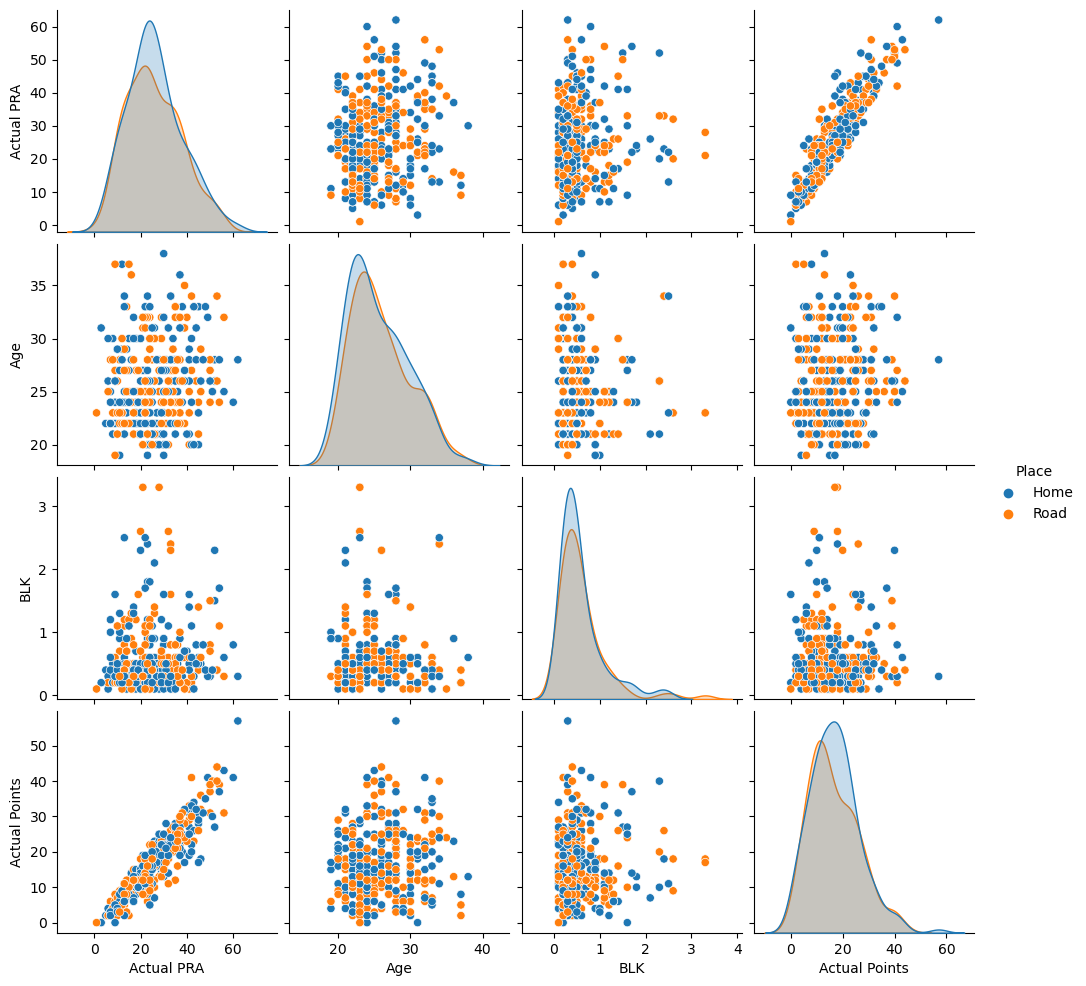

In [6]:
df2 = df[['Actual PRA', 'Age','BLK', 'Actual Points','Place']]
sns.pairplot(df2, hue="Place")

In [7]:
df_groups = df.groupby('Place')['Actual Points'].mean()

<Axes: title={'center': 'Actual Points by Place'}, xlabel='Place', ylabel='Total Points'>

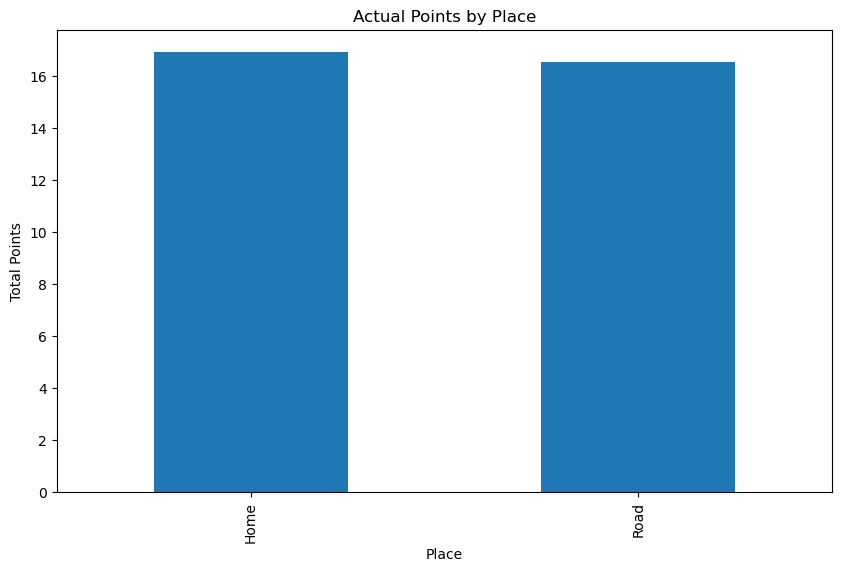

In [8]:
df_groups.plot(kind='bar', title='Actual Points by Place',
               ylabel='Total Points', xlabel='Place', figsize=(10, 6))

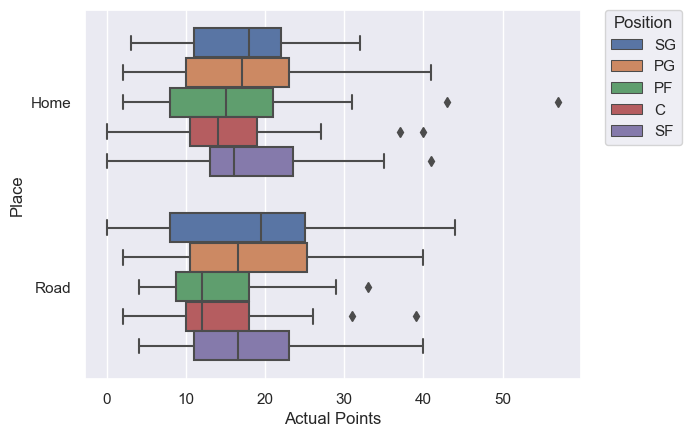

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme()
ax = sns.boxplot(x="Actual Points", y='Place',data=df, hue='Position')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Position")

<Axes: xlabel='Actual Points', ylabel='Density'>

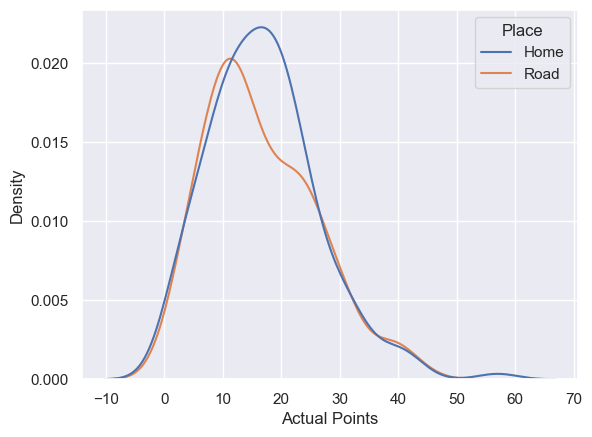

In [10]:
sns.kdeplot(x = 'Actual Points', hue = 'Place', data=df)

## Modeling

In [11]:
df.columns

Index(['Date', 'Team', 'Opponent', 'Place', 'Position', 'Player', 'Age', 'G',
       'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'L10 GP', 'L10 MIN', 'L10 FG%',
       'L10 3P%', 'L10 FT%', 'L10 REB', 'L10 AST', 'L10 BLK', 'L10 STL',
       'L10 PF', 'L10 TO', 'L10 PTS', 'VsOpp GP', 'VsOpp MIN', 'VsOpp FG%',
       'VsOpp 3P%', 'VsOpp FT%', 'VsOpp REB', 'VsOpp AST', 'VsOpp BLK',
       'VsOpp STL', 'VsOpp PF', 'VsOpp TO', 'VsOpp PTS', 'Place GP',
       'Place MIN', 'Place FG%', 'Place 3P%', 'Place FT%', 'Place REB',
       'Place AST', 'Place BLK', 'Place STL', 'Place PF', 'Place TO',
       'Place PTS', 'Points O/U line', 'PRA O/U line', 'Actual Points',
       'Actual PRA'],
      dtype='o

### Assign Variables Roles

In [12]:
# Assign input variables
X = df.loc[:,['Place', 'Position', 'Player', 'Age', 'G',
       'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'L10 GP', 'L10 MIN', 'L10 FG%',
       'L10 3P%', 'L10 FT%', 'L10 REB', 'L10 AST', 'L10 BLK', 'L10 STL',
       'L10 PF', 'L10 TO', 'L10 PTS', 'VsOpp GP', 'VsOpp MIN', 'VsOpp FG%',
       'VsOpp 3P%', 'VsOpp FT%', 'VsOpp REB', 'VsOpp AST', 'VsOpp BLK',
       'VsOpp STL', 'VsOpp PF', 'VsOpp TO', 'VsOpp PTS', 'Place GP',
       'Place MIN', 'Place FG%', 'Place 3P%', 'Place FT%', 'Place REB',
       'Place AST', 'Place BLK', 'Place STL', 'Place PF', 'Place TO',
       'Place PTS', 'Points O/U line']]

# Assign target variable
y = df['Actual Points']

In [13]:
y

0      22
1      22
2      31
3      14
4       2
       ..
349    18
350    16
351     0
352     3
353    30
Name: Actual Points, Length: 354, dtype: int64

### Handle Missing Values

In [14]:
X = X.fillna(0)
X = pd.get_dummies(X)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### Decision Tree

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
model = DecisionTreeRegressor(max_leaf_nodes=7)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=7)

In [17]:
# pip install graphviz

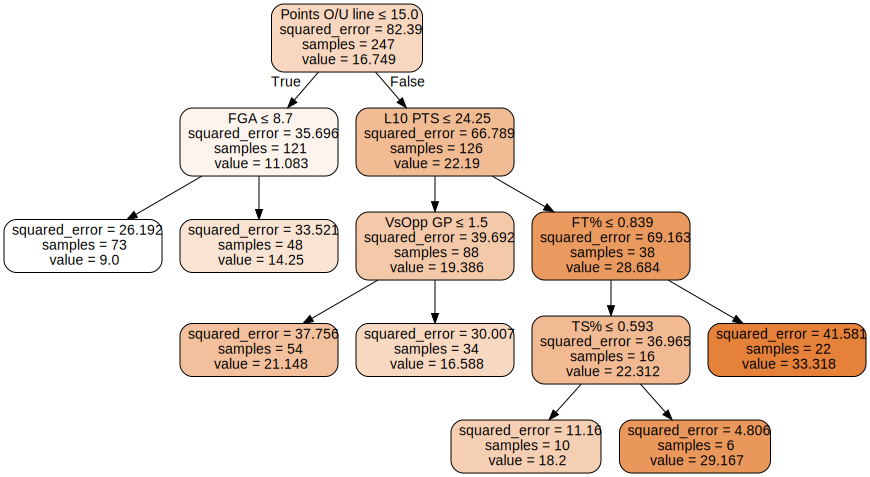

In [18]:
from sklearn import tree

import graphviz 

dot_data = tree.export_graphviz(model, out_file=None) 
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['Not Survived','Survived'],  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  

graph

In [19]:
from sklearn.metrics import r2_score
print('R2:',r2_score(y_test, model.predict(x_test)))

R2: 0.324450214136202


### Gradient Boosting

Rsquared on Testing:  0.29747770149555264


<Axes: title={'center': 'Variables Importance'}, ylabel='Variables'>

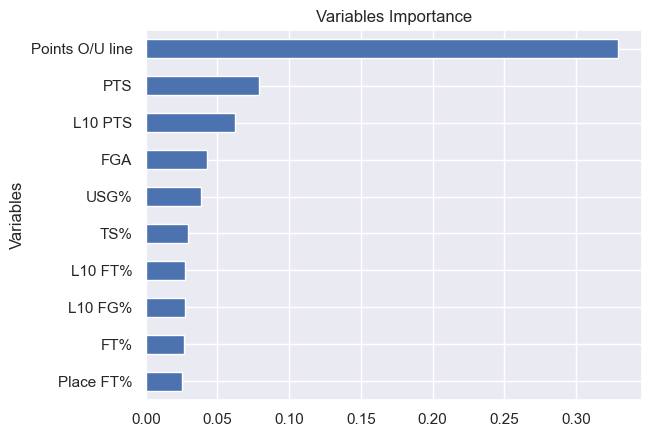

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
r1 = GradientBoostingRegressor()
r1.fit(x_train, y_train)

# Rsquared
from sklearn.metrics import r2_score
print('Rsquared on Testing: ', r2_score(y_test, r1.predict(x_test)))
import warnings
warnings.filterwarnings('ignore')

sorted_idx = (-r1.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':r1.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False, title ="Variables Importance")

### Random Forest

Rsquared on Testing:  0.3665582311817078


<Axes: title={'center': 'Variables Importance'}, ylabel='Variables'>

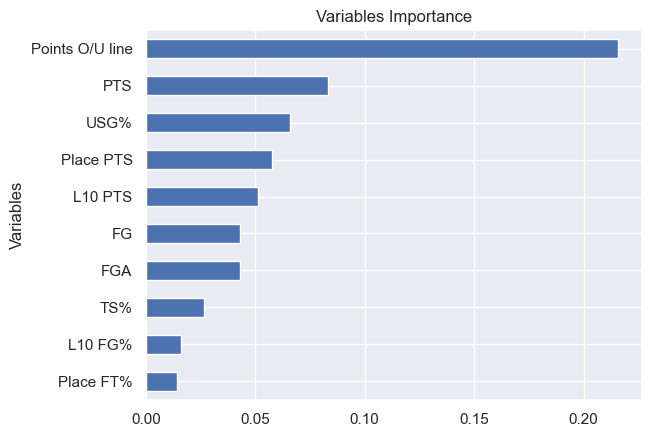

In [21]:
from sklearn.ensemble import RandomForestRegressor
r1 = RandomForestRegressor()
r1.fit(x_train, y_train)

# Rsquared
from sklearn.metrics import r2_score
print('Rsquared on Testing: ', r2_score(y_test, r1.predict(x_test)))
import warnings
warnings.filterwarnings('ignore')

sorted_idx = (-r1.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':r1.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False, title ="Variables Importance")

Rsquared on Training:  0.9265128762664233


<Axes: title={'center': 'Variables Importance'}, ylabel='Variables'>

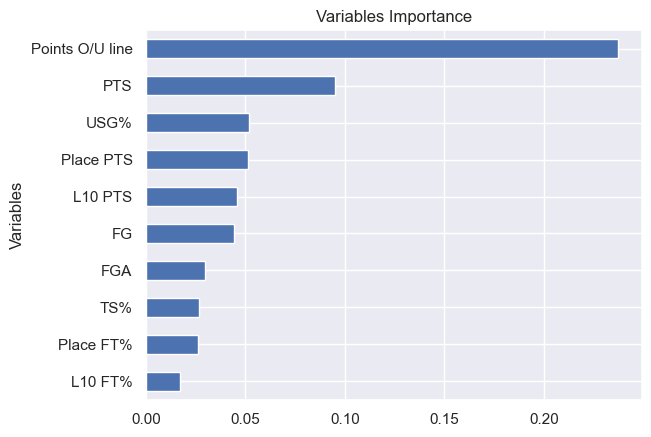

In [22]:
from sklearn.ensemble import RandomForestRegressor
r1 = RandomForestRegressor()
r1.fit(x_train, y_train)

# Rsquared
from sklearn.metrics import r2_score
print('Rsquared on Training: ', r2_score(y_train, r1.predict(x_train)))
import warnings
warnings.filterwarnings('ignore')

sorted_idx = (-r1.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':r1.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False, title ="Variables Importance")

### With `Actual PRA` variable

Rsquared on Testing:  0.8292604273970785


<Axes: title={'center': 'Variables Importance'}, ylabel='Variables'>

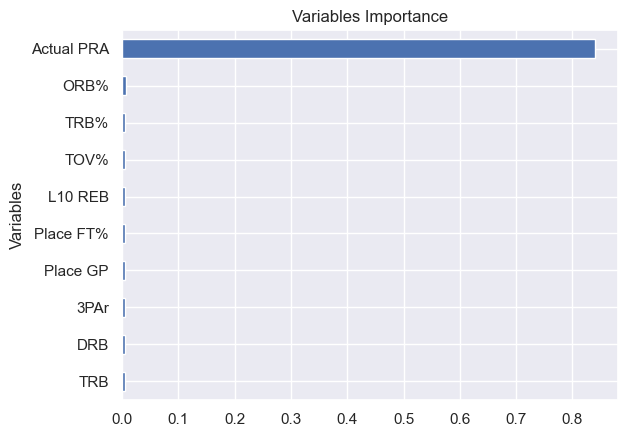

In [23]:
df = pd.read_csv('data2.csv')

# Assign input variables
X = df.loc[:,['Place', 'Position', 'Player', 'Age', 'G',
       'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'L10 GP', 'L10 MIN', 'L10 FG%',
       'L10 3P%', 'L10 FT%', 'L10 REB', 'L10 AST', 'L10 BLK', 'L10 STL',
       'L10 PF', 'L10 TO', 'L10 PTS', 'VsOpp GP', 'VsOpp MIN', 'VsOpp FG%',
       'VsOpp 3P%', 'VsOpp FT%', 'VsOpp REB', 'VsOpp AST', 'VsOpp BLK',
       'VsOpp STL', 'VsOpp PF', 'VsOpp TO', 'VsOpp PTS', 'Place GP',
       'Place MIN', 'Place FG%', 'Place 3P%', 'Place FT%', 'Place REB',
       'Place AST', 'Place BLK', 'Place STL', 'Place PF', 'Place TO',
       'Place PTS', 'Points O/U line', 'PRA O/U line','Actual PRA']]

# Assign target variable
y = df['Actual Points']

X = X.fillna(0)
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import RandomForestRegressor
r1 = RandomForestRegressor()
r1.fit(x_train, y_train)

# Rsquared
from sklearn.metrics import r2_score
print('Rsquared on Testing: ', r2_score(y_test, r1.predict(x_test)))
import warnings
warnings.filterwarnings('ignore')

sorted_idx = (-r1.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':r1.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False, title ="Variables Importance")